<a href="https://colab.research.google.com/github/alisol1373/GEKKO/blob/main/Gekko_RC_model_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install gekko

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 33.1 MB/s eta 0:00:00


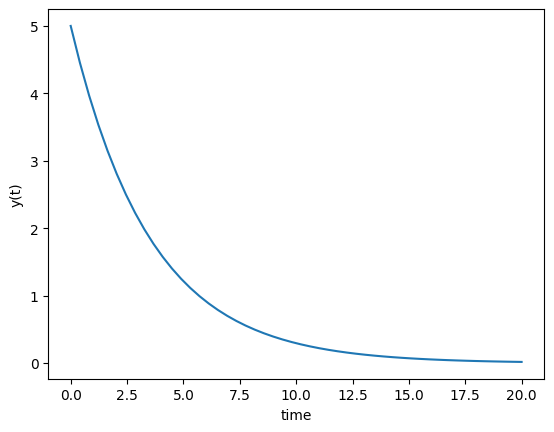

In [ ]:
import numpy as np
from gekko import GEKKO
import matplotlib.pyplot as plt

m = GEKKO()    # create GEKKO model
k = 0.3        # constant
y = m.Var(5.0) # create GEKKO variable
m.Equation(y.dt()==-k*y) # create GEKKO equation
m.time = np.linspace(0,20) # time points

# solve ODE
m.options.IMODE = 4
m.solve(disp=False)

# plot results
plt.plot(m.time,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

apm 34.83.54.189_gk_model1 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            3
   Intermediates:            0
   Connections  :            0
   Equations    :            3
   Residuals    :            3
 
 Number of state variables:           2500
 Number of total equations: -         2000
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            500
 
 **********************************************
 Dynamic Estimation with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ip

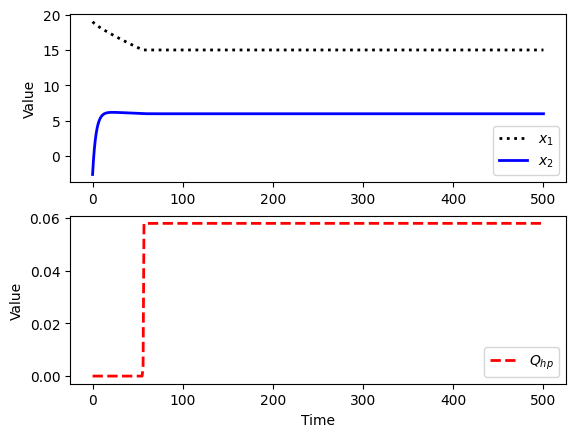

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from gekko import GEKKO

m = GEKKO()



nt = 501
m.time = np.linspace(0,500,nt)

# Parameters
#T = m.MV(value=362,ub=398,lb=298)
#T.STATUS = 1  #Turn status on
#T.DCOST = 0   #by defaulkt it has some epsilon
#Qhp = m.MV(value=0,lb=0,ub=2,name='Qhp',integer=True)
#Qhp.STATUS = 1  # manipulated
#Qhp.FSTATUS = 0 # not measured
#Qhp.DMAX = 1.0
#Qhp.DCOST = 0


# Variables
x1 = m.Var(value=19,ub=20,lb=15) #
x2 = m.Var(value=-2.65)
x3 = m.Var(lb=0,ub=2,integer=True)
#p = np.zeros(nt)
#p[-1] = 1.0
#final = m.Param(value=p)

# Intermediates
#k1 = m.Intermediate(4000*m.exp(-2500/T))
#k2 = m.Intermediate(6.2e5*m.exp(-5000/T))

# Equations
m.Equation(x2.dt()== 2*((5 - x2)/7.37 + (x1-x2)/69.5))
m.Equation(x1.dt()== (x2-x1)/(69.5*2.246) + x3)

# Objective Function (min)
m.Obj(np.sum(x3))

m.options.IMODE = 5 # 1=APOPT, 2=BPOPT, 3=IPOPT
m.solve() #If you want to solve it locally put "remote" = false

print('Objective: ' + str(x3))




plt.figure(1)

plt.subplot(2,1,1)
plt.plot(m.time,x1.value,'k:',lw=2,label=r'$x_1$')
plt.plot(m.time,x2.value,'b-',lw=2,label=r'$x_2$')
plt.ylabel('Value')
plt.legend(loc='best')

plt.subplot(2,1,2)
plt.plot(m.time,x3.value,'r--',lw=2,label=r'$Q_{hp}$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Value')

plt.show()

In [ ]:
x3

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0142775227e-09, 0.0036673594128, 0.057829257102, 0.057850353338, 0.057866579681, 0.057879060079, 0.057888659296, 0.057896042472, 0.057901721194, 0.057906088947, 0.057909448376, 0.057912032259, 0.057914019636, 0.057915548215, 0.057916723911, 0.05791762819, 0.05791832371, 0.057918858665, 0.057919270123, 0.057919586592, 0.057919830003, 0.057920017221, 0.057920161218, 0.057920271973, 0.057920357159, 0.057920422679, 0.057920473074, 0.057920511834, 0.057920541647, 0.057920564577, 0.057920582214, 0.057920595779, 0.057920606212, 0.057920614237, 0.057920620409, 0.057920625156, 0.057920628808, 0.057920631616, 0.057920633776, 0.057920635438, 0.057920636716, 0.057920637699, 0.057920638455, 0.057920639036, 0.057920639483, 0.0

In [ ]:
from gekko import GEKKO
m = GEKKO() # Initialize gekko
m.options.SOLVER=1  # APOPT is an MINLP solver

# optional solver settings with APOPT
m.solver_options = ['minlp_maximum_iterations 500', \
                    # minlp iterations with integer solution
                    'minlp_max_iter_with_int_sol 10', \
                    # treat minlp as nlp
                    'minlp_as_nlp 0', \
                    # nlp sub-problem max iterations
                    'nlp_maximum_iterations 50', \
                    # 1 = depth first, 2 = breadth first
                    'minlp_branch_method 1', \
                    # maximum deviation from whole number
                    'minlp_integer_tol 0.05', \
                    # covergence tolerance
                    'minlp_gap_tol 0.01']

# Initialize variables
x1 = m.Var(value=1,lb=1,ub=5)
x2 = m.Var(value=5,lb=1,ub=5)
# Integer constraints for x3 and x4
x3 = m.Var(value=5,lb=1,ub=5,integer=True)
x4 = m.Var(value=1,lb=1,ub=5,integer=True)
# Equations
m.Equation(x1*x2*x3*x4>=25)
m.Equation(x1**2+x2**2+x3**2+x4**2==40)
m.Obj(x1*x4*(x1+x2+x3)+x3) # Objective
m.solve(disp=False) # Solve
print('Results')
print('x1: ' + str(x1.value))
print('x2: ' + str(x2.value))
print('x3: ' + str(x3.value))
print('x4: ' + str(x4.value))
print('Objective: ' + str(m.options.objfcnval))

Results
x1: [1.3589086474]
x2: [4.5992789966]
x3: [4.0]
x4: [1.0]
Objective: 17.532267301
